# Principal Component Analysis in Python

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting the graphs
import matplotlib.pyplot as plt

# Importing the machine learning libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint

# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Import the dataset
df = pd.read_csv(path + "pca.csv", index_col=0)
df.head()

,GOOG,GOOGL,AMZN,MA,BA,C,ABT,CRM,COST,ACN,AVGO,MMM,CVS,FIS,SYK,MDLZ,CI,CME,ISRG,COP
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,1065.000000,1073.209961,1189.010010,148.906738,282.886383,66.456902,55.270180,104.410004,177.262619,145.510391,231.258133,209.198364,65.703430,90.138031,151.780838,39.286922,200.766891,131.867477,375.250000,49.867218
2018-01-03,1082.479980,1091.520020,1204.199951,150.778992,283.801239,66.662445,55.392387,105.290001,179.389923,146.181931,233.787170,209.189468,65.417442,90.667137,152.636368,39.444405,204.136826,133.980453,383.820007,50.786686
2018-01-04,1086.400024,1095.760010,1209.589966,152.729645,282.724396,67.484688,55.298374,106.680000,177.996857,147.912842,233.865082,211.923889,67.142265,91.340523,152.588287,39.537041,205.207260,135.410294,376.920013,51.372623
2018-01-05,1102.229980,1110.290039,1229.140015,155.895767,294.322296,67.395294,55.458187,108.099998,176.726089,149.132996,235.250839,213.575165,70.109261,91.859985,154.818405,40.046532,208.686172,136.293716,379.010010,51.273472
2018-01-08,1106.939941,1114.209961,1246.869995,156.367020,295.570740,66.608818,55.298374,108.860001,177.413223,150.324783,235.813828,212.882675,69.501572,92.090866,156.933121,39.842739,206.376816,138.188080,391.859985,51.796291


Since we will be working on daily returns, we write the code as follows:

In [2]:
data_daily_returns = df.pct_change()
data_daily_returns.dropna(inplace=True)

If we have to check the number of rows and columns of the array, we use the following code:

In [3]:
data_daily_returns.shape

(501, 20)

Here, we understand that there are 20 columns corresponding to the number of companies we have selected and 501 is the data points we have of each company. Moving ahead, we will now use the Principal Component Analysis code. Since we are trying to reduce the variables, let’s keep the number of Principal components as 18.

In [4]:
N_PRIN_COMPONENTS = 18
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(data_daily_returns)

PCA(n_components=18)

You can check the number of rows and columns in the array with the “shape” command. 

In [5]:
pre_process = pca.components_.T 
pre_process.shape

(20, 18)

You can see that we have gone from 501 to 20. Now, we have to use this for trading. First we will scale the data.

In [6]:
# Using transpose on the dataset
X = pca.components_.T
X.shape

# Scaling the dataset
X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(20, 18)


In [7]:
# Using k-means algorithm on dataset
clf = KMeans(n_clusters=4, init='k-means++', max_iter=30,
             n_init=10, random_state=7)
print(clf)

# Using the fit function
clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters: %d" % n_clusters_)

clustered = clf.labels_
clustered

KMeans(max_iter=30, n_clusters=4, random_state=7)

Clusters: 4


array([2, 2, 2, 2, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 2, 3])

To visualise it, we would use the t-SNE tool which is used to visualise high dimensional data into a 2D data.

The exact code is as follows:

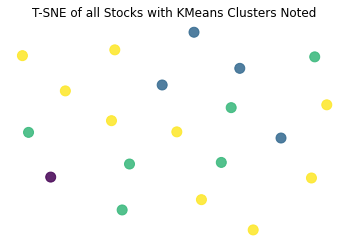

In [8]:
clustered_series = pd.Series(index=data_daily_returns.columns, 
                             data=clustered.flatten())
clustered_series_all = pd.Series(
                            index=data_daily_returns.columns,
                            data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

X_tsne = TSNE(learning_rate=1000, perplexity=25, 
              random_state=1337).fit_transform(X)


plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1]
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with KMeans Clusters Noted');

You can see that there are 4 clusters formed. While it may look like they are spread out, the t-SNE tool has visualised the clusters in a 2 dimensional space, and hence you can't see the clusters grouped together. 

Once these clusters are formed, you can use them further for analysis or your own trading strategy.